# Exercise 2
Given a dataset called run.csv which contains sensor data of my running over time, the 3 dimensional plot of this data looks somewhat noisy. Smooth it out, both getting rid of outlier noise and thresholding values to within one standard deviations of the mean.

Make my run look like that of a dancer, like water lapping rocks in a stream, instead of points of noise.

**Hint**: a z-score can be created with the `scipy.stats.zscore` function.

Text(0.5, 0, 'Altitude')

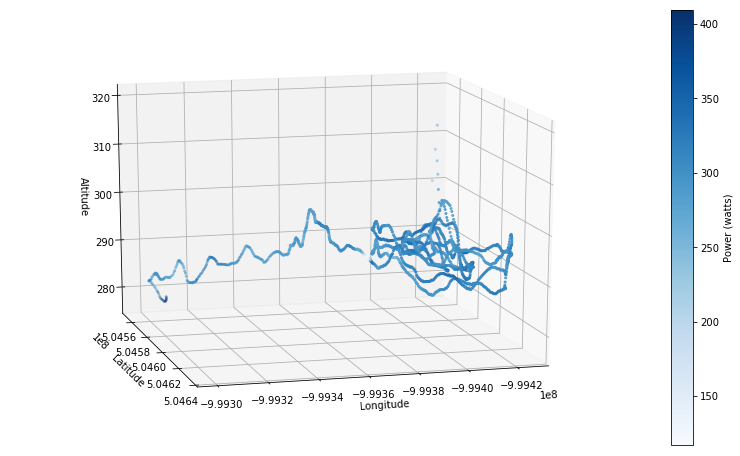

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
df=pd.read_csv("datasets/run.csv")

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,8))
ax = fig.gca(projection='3d')
artists=ax.scatter(df["position_long"],df["position_lat"],df["enhanced_altitude"],
           s=4,c=df["Power"],cmap = 'Blues')
plt.colorbar(artists).set_label("Power (watts)")
ax.view_init(15,75)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude')

In [19]:
import pandas as pd
import numpy as np
import scipy.stats as stats

df=pd.read_csv("datasets/run.csv")
df["power_z"]=stats.zscore(df["Power"])

def thresh(item):
    if item < -1:
        return -1
    elif item > 1:
        return 1
    else:
        return item

df["power_z"]=df["power_z"].apply(thresh)

Text(0.5, 0, 'Altitude')

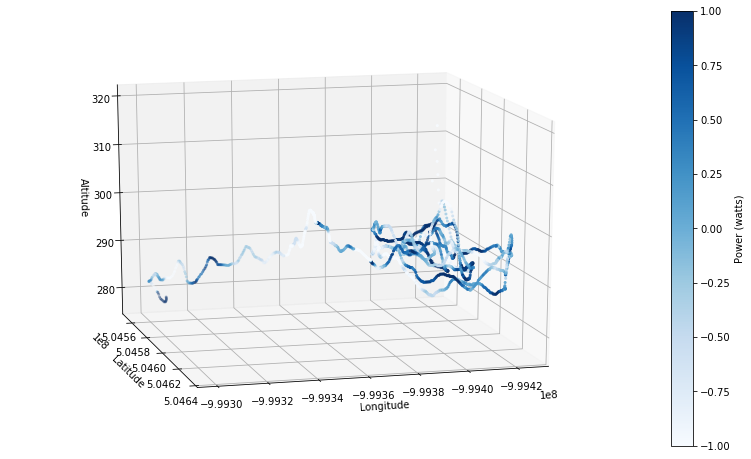

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,8))
ax = fig.gca(projection='3d')
artists=ax.scatter(df["position_long"],df["position_lat"],df["enhanced_altitude"],
           s=4,c=df["power_z"],cmap = 'Blues')
plt.colorbar(artists).set_label("Power (watts)")
ax.view_init(15,75)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude')